In [ ]:
#ID NUMBER   : 190031094
#NAME        : Naveen  
#PRACTICAL   : #1 - Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file = pd.read_csv("auto-mpg.CSV")
file

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
file.shape

(398, 9)

In [ ]:
file.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
file['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
file = file[file.horsepower != '?']    # to delete the '?' values present in the dataframe

In [ ]:
file['horsepower'] = pd.to_numeric(file.horsepower)      # converting object to numeric type
file.dtypes

<ipython-input-8-7d6abbcb4101>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['horsepower'] = pd.to_numeric(file.horsepower)      # converting object to numeric type


mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
file.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
file.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

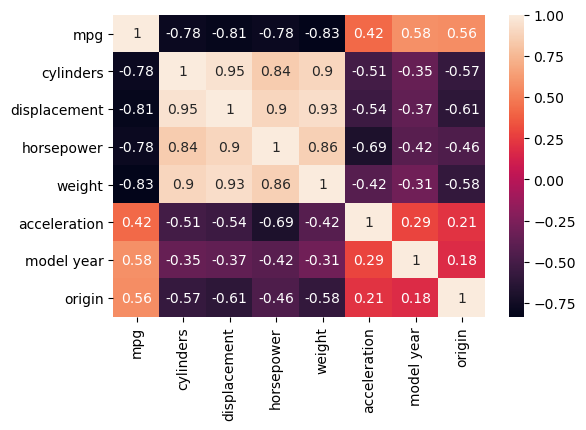

In [ ]:
# heatmap - to find the most correlated values

plt.figure(dpi=100)
sns.heatmap(np.round(file.corr(),3),annot=True)
plt.show()

In [ ]:
max(file.corr())

'weight'

In [ ]:
file.origin.unique()

array([1, 3, 2], dtype=int64)

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = file[['displacement','horsepower','acceleration']]
Y = file.weight

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=4)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   horsepower    392 non-null    int64  
 2   acceleration  392 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 12.2 KB


In [ ]:
lnreg = LinearRegression()

lnreg.fit(X_train,Y_train)

y_pred = lnreg.predict(X_test)

In [ ]:
y_pred.shape

(118,)

In [ ]:
y_pred

array([2649.00642008, 4220.2825232 , 2987.07471549, 2167.43249927,
       2620.59161434, 3265.08876063, 3097.67024045, 2731.54473354,
       2001.43045122, 3040.7869932 , 1884.80542049, 3114.02652744,
       3751.81413235, 3650.08956575, 4329.98203665, 2696.54390206,
       2448.87252731, 4276.48629458, 4119.40502301, 2728.88704862,
       2396.88624389, 3262.42775085, 2323.57788232, 3822.14674502,
       4936.2522799 , 2430.2417416 , 2411.69266896, 2110.38638564,
       3221.26780798, 2818.74593224, 2068.21738301, 3984.44409694,
       2444.59755244, 4441.86582741, 2633.04046181, 4487.62315306,
       3739.82685929, 5170.36751046, 2498.77280385, 2150.92048841,
       2975.20136372, 3639.13694443, 4852.78851182, 3610.18266888,
       3172.88938304, 2119.05407433, 3751.32031625, 3372.58172966,
       1965.24064344, 2426.85616199, 4311.38783657, 3758.78666916,
       2313.25250039, 4341.4754936 , 2723.79010651, 3727.79256671,
       1963.94054443, 3233.85340359, 3201.47227212, 3578.18286

In [ ]:
lnreg.score(X_test,Y_test)

0.874837905944847

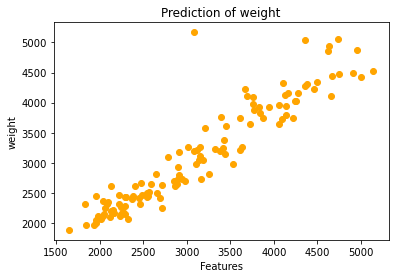

In [ ]:
plt.scatter(Y_test,y_pred,color='orange')
plt.title("Prediction of weight")
plt.xlabel("Features")
plt.ylabel("weight")
plt.show()